<a href="https://colab.research.google.com/github/2303A51564/ADM_2025/blob/main/LAB_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
file_path = "/content/SLR_Salary_dataset.csv"  # Path to uploaded file
df = pd.read_csv(file_path)

In [10]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [11]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None


In [12]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


In [13]:
df.dropna(inplace=True)

In [14]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Unnamed: 0  YearsExperience         Salary
count   30.000000        30.000000      30.000000
mean    14.500000         5.413333   76004.000000
std      8.803408         2.837888   27414.429785
min      0.000000         1.200000   37732.000000
25%      7.250000         3.300000   56721.750000
50%     14.500000         4.800000   65238.000000
75%     21.750000         7.800000  100545.750000
max     29.000000        10.600000  122392.000000


In [15]:
feature_col = df.columns[0]
target_col = df.columns[1]

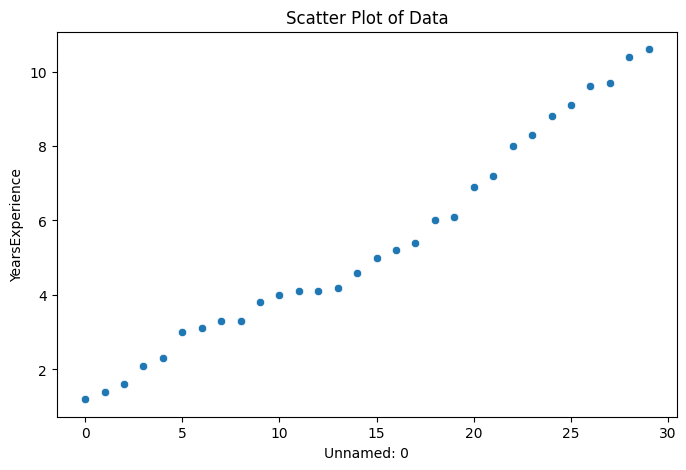

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df[feature_col], y=df[target_col])
plt.xlabel(feature_col)
plt.ylabel(target_col)
plt.title("Scatter Plot of Data")
plt.show()


In [17]:
X = df[[feature_col]].values
y = df[target_col].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [23]:
print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")


Model Performance:
Mean Absolute Error (MAE): 0.3468
Mean Squared Error (MSE): 0.1994
Root Mean Squared Error (RMSE): 0.4466
R-squared Score: 0.9631


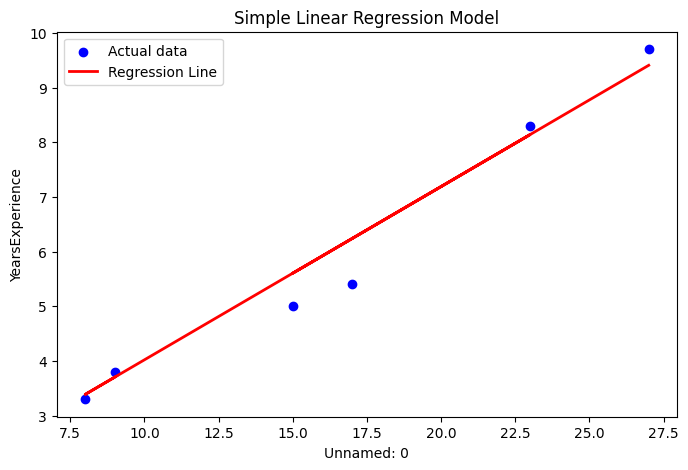

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label="Actual data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel(feature_col)
plt.ylabel(target_col)
plt.title("Simple Linear Regression Model")
plt.legend()
plt.show()